<a href="https://colab.research.google.com/github/Raidin/DeepLearningReserach/blob/remind_basic_skill/backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BackPropagation Example**
---
> 2개의 Input과 N(2)개의 Hidden Layer를 Forward하여 1개의 output값을 Regression하는 Neural Network Backpropagation 과정 구현

* Input data : [0.1, 0.9]
* Target : [0.2, 0.7]
* Layer-1 weight : [[0.1, 1.0], [0.1, 0.5]]
* Layer-2 weight : [[0.5], [0.1]]
* Output : [1.0]
* Using Activation : [Sigmoid, Tanh, Relu, LeakyRelu, ELU]
* Error Fuction : MSE(Mean Squared Error)


* Neural Network

![NeuralNetwork](https://docs.google.com/uc?export=download&id=1yH_xuGN8bZLO5v7nxdNzrcSAwPSy399a)

* Forward Equation

![NeuralNetwork](https://docs.google.com/uc?export=download&id=1QZoIlkyIC3Tv2ZlMGrQj7ulNnSt7I9V-)

* Backward Equation

![NeuralNetwork](https://docs.google.com/uc?export=download&id=1lLUZlwaXf1Y394q_DBwZB-lcekpADoi9)

In [0]:
import copy
import numpy as np
import matplotlib.pyplot as plt

###Weight Class
---
  * Detail
    * Initialize Each Layer Weight

  * Init param
    * in_size(default=1) : Input data size
    * hidden_size(default=2) : 각 Hidden Layer의 weight 수
    * out_size(default=2) : 최종 output 수
    * layer_size(default=2) : hidden layer 수

  * Member
    * Fixed() : 고정된 값 사용
    * Uniform() : [0:1] 사이의 uniform한 값 사용
    * NormalDistribution() : 정규분포를 가지는 값 사용

In [0]:
class Weight:
    def __init__(self, in_size=2, hidden_size=2, out_size=2, layer_size=2):
        self.in_size = in_size
        self.hidden_size = hidden_size
        self.out_size = out_size
        self.layer_size = layer_size
        self.weights = []

        np.random.seed(777)

    def getWeights(self):
        return self.weights

    def Fixed(self):
        self.weights.append(np.array([[0.1, 1.0], [0.1, 0.5]], dtype='float16'))
        self.weights.append(np.array([[0.5], [0.1]], dtype='float16'))

    def Uniform(self):
        for i in range(self.layer_size):
            self.weights.append(np.random.uniform(0, 1, (self.in_size, self.hidden_size)))
            self.in_size = self.hidden_size
            self.hidden_size = self.out_size if i+1 == self.layer_size-1 else self.hidden_size

    def NormalDistribution(self):
        weight_init_std = 0.1
        for i in range(self.layer_size):
            self.weights.append(weight_init_std * np.random.randn(self.in_size, self.hidden_size))
            self.in_size = self.hidden_size
            self.hidden_size = self.out_size if i+1 == self.layer_size-1 else self.hidden_size

###DraowLossPlot()
---
  * Detail
    * Loss graph display per epoch 
  * param
    * **loss : loss value per epoch 

In [0]:
def DrawLossPlot(**loss) :
    for key, value in loss.items():
        plt.plot(value, label=key, linewidth='1.0', linestyle='-')
    plt.grid(alpha=.9, linestyle='--')
    plt.legend(loc='upper right', fontsize='large')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Loss')
    plt.show()

###MeanSquredError()
---
  * Detail
    * Error Function(Using Mean Squared Error)
  * param
    * y : network로부터 출력된 결과
    * t : Ground Truth(정답)
    * prime(default=False) : 미분적용 여부
    

In [0]:
def MeanSquredError(y, t, prime=False):
    if prime:
        return y - t
    else:
        return np.sum(pow(t - y,2))/2

###Sigmoid()
---
  * Detail
    * Activation Function 
  * param
    * x : 입력 값
    * prime(default=False) : 미분적용 여부
    

In [0]:
def Sigmoid(x, prime=False):
    if prime:
        return Sigmoid(x) * (1-Sigmoid(x))
    else:
        return 1 / (1 + np.exp(-x))

###Forward()
---
  * Detail
    * Feed Forward
  * param
    * x : 입력 값
    * weights : layer weight 값
    * act : activation fucntion

In [0]:
def Forward(x, weigths, act):
    result = []

    for i, w in enumerate(weigths):
        ele = dict()
        ele['x'] = x
        ele['w'] = w
        ele['y'] = np.dot(x, w)
        ele['a'] = act(ele['y'])
        x = ele['a']
        result.append(ele)

    return result

###Backward()
---
  * Detail
    * Feed Backward
  * param
    * forward : forward 결과 값
    * t : ground truch
    * act : activation fucntion

In [0]:
def Backward(forward, t, act):
    dout = MeanSquredError(forward[-1]['a'], t, True) # dt/da2
    forward.reverse()
    result = []

    for f in forward:
        dout = dout * act(f['y'], True) # dt/dy2
        result.append(np.dot(f['x'].T, dout))
        dout = np.dot(dout, f['w'].T)

    return result

###GradientDescent()
---
  * Detail
    * Gradient Descent
  * param
    * weights : 최초 사용된 weight
    * grad : backpropagation을 통해서 계산된 gradient 값
    * lr(learning rate) : 학습율

In [0]:
def GradientDescent(weigths, grad, lr=0.5):
    grad.reverse()

    for i, w in enumerate(weigths):
        w -= lr * grad[i]

In [0]:
def Train(x, t, params, epoch=100, act_func=Sigmoid, is_visible_loss=False):
    loss = []

    for i in range(epoch):
        # Forward
        forward = Forward(x, params, act_func)
        out = forward[-1]['a']
        loss.append(MeanSquredError(out, t))

        # Backward
        grad = Backward(forward, t, act_func)

        # Gradient Descent
        GradientDescent(params, grad)

        if is_visible_loss : print('[{}]-iter loss :: {}'.format(i+1, loss[-1]))

    print('\t[TARGET] ::', t)
    print('\t[OUTPUT] ::', out)
    print('\t[LOSS] ::', loss[-1])

    return loss

- Input :: [[0.1 0.9]]
- Weight
 [array([[0.1, 1. ],
       [0.1, 0.5]], dtype=float16), array([[0.5],
       [0.1]], dtype=float16)]
 ============= USING Sigmoid ACTIVATION FUNCTION ============= 
	[TARGET] :: [1.]
	[OUTPUT] :: [[0.873]]
	[LOSS] :: 0.008056640625


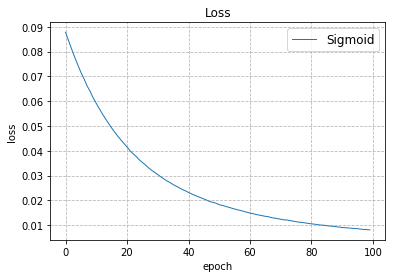

In [50]:
t = np.array([1.0], dtype='float16')
x = np.array([[0.1, 0.9]], dtype='float16')
print('- Input ::', x)

w = Weight(in_size=x.shape[1], out_size=t.shape[0])
w.Fixed()
weight_init = w.getWeights()
print('- Weight\n', weight_init)

loss_dict = dict()
# activation_func = [Sigmoid, HyperbolicTangent, Relu, LeakyRelu, ELU]

# Activation Function을 다르게 적용 할지 유무 결정
is_apply_each_act = False

if is_apply_each_act:
    # Apply Each Activation Function
    for act in activation_func:
        print(' ============= USING {} ACTIVATION FUNCTION ============= '.format(act.__name__))
        loss = Train(x, t, copy.deepcopy(weight_init), act_func=act)
        loss_dict[act.__name__] = loss
else:
    act = Sigmoid
    print(' ============= USING {} ACTIVATION FUNCTION ============= '.format(act.__name__))
    loss = Train(x, t, copy.deepcopy(weight_init), act_func=act, is_visible_loss=False)
    loss_dict[act.__name__] = loss

DrawLossPlot(**loss_dict)